In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)
len(X_test)

60000

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

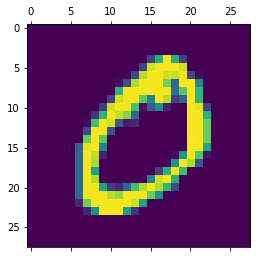

In [10]:
plt.matshow(X_train[1]);

In [12]:
X_train.shape

(60000, 28, 28)

In [31]:
# scale X_train, X_train
X_train = X_train / 255
X_test = X_test / 255

In [32]:
# flatten X_train
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [33]:
X_train_flattened.shape
X_test_flattened.shape

(60000, 784)

(10000, 784)

In [34]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')    # input shape (784,1), output (10,1)
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7056 - accuracy: 0.8202
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.9120
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9270


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9235


[0.2732633948326111, 0.9235000014305115]

In [38]:
model.predict(X_test_flattened)

array([[2.2145778e-02, 2.7055194e-07, 6.5197498e-02, ..., 9.9977201e-01,
        8.3311945e-02, 6.1592799e-01],
       [3.7601167e-01, 4.3754876e-03, 9.9951929e-01, ..., 9.5425176e-13,
        1.0800207e-01, 2.5297315e-09],
       [3.7461519e-04, 9.9210763e-01, 6.6562796e-01, ..., 1.5534502e-01,
        3.4689480e-01, 4.1336179e-02],
       ...,
       [2.5385177e-06, 2.3261027e-06, 1.1158288e-03, ..., 1.5899488e-01,
        3.6722130e-01, 6.6651368e-01],
       [1.0364563e-04, 1.2106613e-04, 1.3402104e-04, ..., 2.9532917e-05,
        5.2155674e-01, 7.6326258e-05],
       [5.1632226e-03, 1.8867430e-10, 1.7209733e-01, ..., 1.3067505e-08,
        6.6407447e-05, 8.4572844e-07]], dtype=float32)

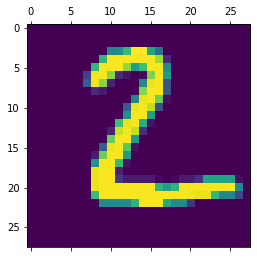

In [45]:
plt.matshow(X_test[1]);


In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2145778e-02, 2.7055194e-07, 6.5197498e-02, 9.6419108e-01,
       3.2720864e-03, 7.6271683e-02, 1.1091952e-06, 9.9977201e-01,
       8.3311945e-02, 6.1592799e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[1])
# np.argmin(y_predicted[0])

2

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    3,    0,    4,    6,    2,    1,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,    9,  924,   27,    8,    1,   11,   10,   33,    5],
       [   1,    0,   14,  953,    0,    9,    2,   10,   12,    9],
       [   1,    1,    5,    2,  917,    0,   10,    4,    9,   33],
       [  10,    2,    5,   64,   11,  738,   17,    9,   29,    7],
       [   8,    3,    7,    1,    7,    9,  920,    2,    1,    0],
       [   1,    5,   23,    9,    9,    0,    0,  948,    2,   31],
       [   6,    9,    7,   48,    8,   21,   10,   14,  842,    9],
       [  10,    7,    2,   16,   27,    4,    0,   25,    1,  917]])>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 42.0, 'Predicted')

Text(69.0, 0.5, 'Truth')

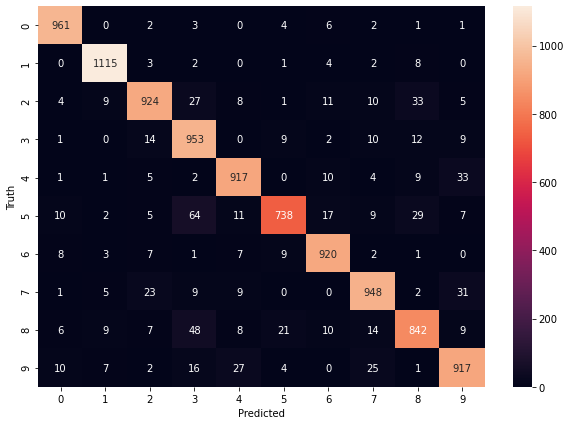

In [51]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    # input shape (784,1), output (10,1)
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4525 - accuracy: 0.8726: 0s - loss: 0.4570 - accuracy: 
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1337 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0887 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9843


In [54]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9735


[0.08250250667333603, 0.9735000133514404]

In [55]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([5.0442547e-02, 1.2496263e-02, 5.7517117e-01, 9.8887050e-01,
       2.8205159e-07, 2.3769408e-02, 9.5132478e-08, 9.9999630e-01,
       2.1069467e-02, 3.2686281e-01], dtype=float32)

In [56]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [57]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    0,    1,    2,    2,    3,    2,    4],
       [   0, 1123,    3,    1,    0,    1,    2,    0,    5,    0],
       [   3,    0, 1009,    2,    4,    0,    3,    8,    2,    1],
       [   0,    0,    2,  991,    0,    3,    0,    5,    4,    5],
       [   1,    0,    1,    0,  968,    0,    2,    3,    0,    7],
       [   2,    1,    0,   17,    5,  849,    5,    2,    6,    5],
       [   3,    2,    2,    1,    9,    5,  930,    0,    6,    0],
       [   1,    5,   13,    2,    4,    0,    0,  992,    3,    8],
       [   3,    1,    3,    7,    5,    2,    3,    3,  941,    6],
       [   3,    4,    1,   12,   12,    2,    0,    7,    1,  967]])>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 42.0, 'Predicted')

Text(69.0, 0.5, 'Truth')

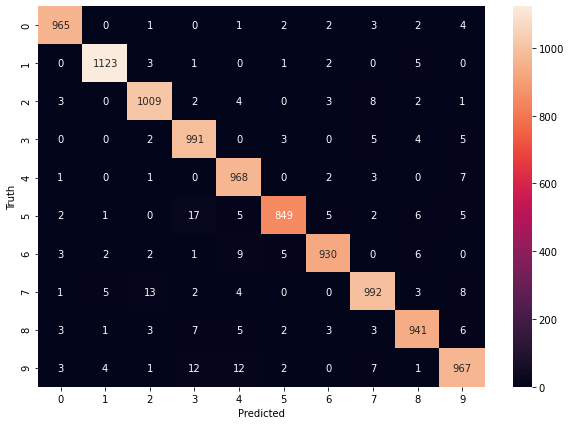

In [58]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),    # input shape (784,1), output (10,1)
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4437 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1341 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9855
